# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.exe", worker_id=3, seed=1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.27946243 0.
 1.         0.         0.         0.74556106 0.         0.
 1.         0.         0.48277503 0.         1.         0.
 0.         0.30341193 0.         0.         1.         0.
 0.46494457 0.         0.         1.         0.         0.08466676
 0.         1.         0.         0.         0.95967758 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
#env_info = env.reset(train_mode=False)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state
#score = 0                                          # initialize the score
#while True:
    #action = np.random.randint(action_size)        # select an action
    #env_info = env.step(action)[brain_name]        # send the action to the environment
    #next_state = env_info.vector_observations[0]   # get the next state
    #reward = env_info.rewards[0]                   # get the reward
    #done = env_info.local_done[0]                  # see if episode has finished
    #score += reward                                # update the score
    #state = next_state                             # roll over the state to next time step
    #if done:                                       # exit loop if episode finished
        #break
    
#print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
state = env_info.vector_observations[0]
state_size = len(state)
env_info = env.reset(train_mode=True)[brain_name]
from dqn_agent import Agent
import matplotlib.pyplot as plt
import torch
from collections import deque
# hyper parameters

BUFFER_SIZE = int(1e5)
BATCH_SIZE = 64
GAMMA = 0.99
TAU = 1e-3
LR = 5e-4
UPDATE_EVERY = 4

agent = Agent(BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR, UPDATE_EVERY, state_size, 4, 0)



def dqn(n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):


    training_scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        trainingState = env_info.vector_observations[0]
        trainingScore = 0
        for t in range(max_t):
            action = agent.act(trainingState, eps)
            env_info = env.step(np.int32(action))[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(trainingState, action, reward, next_state, done)
            trainingState = next_state
            trainingScore += reward
            if done:
                break
        scores_window.append(trainingScore)  # save most recent score
        training_scores.append(trainingScore)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.QNetwork_local.state_dict(), 'checkpoint.pth')
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode,
                                                                                         np.mean(scores_window)))
            torch.save(agent.QNetwork_local.state_dict(), 'solved.pth')
    torch.save(agent.QNetwork_local.state_dict(), 'trained_final.pth')
    return training_scores


scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

cuda:0
Episode 100	Average Score: 0.44
Episode 200	Average Score: 3.38
Episode 300	Average Score: 6.75
Episode 400	Average Score: 9.91
Episode 487	Average Score: 13.01
Environment solved in 487 episodes!	Average Score: 13.01
Episode 488	Average Score: 13.03
Environment solved in 488 episodes!	Average Score: 13.03
Episode 489	Average Score: 13.10
Environment solved in 489 episodes!	Average Score: 13.10
Episode 490	Average Score: 13.10
Environment solved in 490 episodes!	Average Score: 13.10
Episode 491	Average Score: 13.14
Environment solved in 491 episodes!	Average Score: 13.14
Episode 492	Average Score: 13.17
Environment solved in 492 episodes!	Average Score: 13.17
Episode 493	Average Score: 13.21
Environment solved in 493 episodes!	Average Score: 13.21
Episode 494	Average Score: 13.23
Environment solved in 494 episodes!	Average Score: 13.23
Episode 495	Average Score: 13.29
Environment solved in 495 episodes!	Average Score: 13.29
Episode 496	Average Score: 13.32
Environment solved in 

Episode 577	Average Score: 14.02
Environment solved in 577 episodes!	Average Score: 14.02
Episode 578	Average Score: 13.99
Environment solved in 578 episodes!	Average Score: 13.99
Episode 579	Average Score: 14.05
Environment solved in 579 episodes!	Average Score: 14.05
Episode 580	Average Score: 14.05
Environment solved in 580 episodes!	Average Score: 14.05
Episode 581	Average Score: 14.10
Environment solved in 581 episodes!	Average Score: 14.10
Episode 582	Average Score: 14.09
Environment solved in 582 episodes!	Average Score: 14.09
Episode 583	Average Score: 14.05
Environment solved in 583 episodes!	Average Score: 14.05
Episode 584	Average Score: 14.07
Environment solved in 584 episodes!	Average Score: 14.07
Episode 585	Average Score: 14.07
Environment solved in 585 episodes!	Average Score: 14.07
Episode 586	Average Score: 13.93
Environment solved in 586 episodes!	Average Score: 13.93
Episode 587	Average Score: 13.93
Environment solved in 587 episodes!	Average Score: 13.93
Episode 58

Episode 669	Average Score: 14.38
Environment solved in 669 episodes!	Average Score: 14.38
Episode 670	Average Score: 14.41
Environment solved in 670 episodes!	Average Score: 14.41
Episode 671	Average Score: 14.37
Environment solved in 671 episodes!	Average Score: 14.37
Episode 672	Average Score: 14.38
Environment solved in 672 episodes!	Average Score: 14.38
Episode 673	Average Score: 14.47
Environment solved in 673 episodes!	Average Score: 14.47
Episode 674	Average Score: 14.59
Environment solved in 674 episodes!	Average Score: 14.59
Episode 675	Average Score: 14.57
Environment solved in 675 episodes!	Average Score: 14.57
Episode 676	Average Score: 14.62
Environment solved in 676 episodes!	Average Score: 14.62
Episode 677	Average Score: 14.66
Environment solved in 677 episodes!	Average Score: 14.66
Episode 678	Average Score: 14.62
Environment solved in 678 episodes!	Average Score: 14.62
Episode 679	Average Score: 14.59
Environment solved in 679 episodes!	Average Score: 14.59
Episode 68

Episode 761	Average Score: 14.32
Environment solved in 761 episodes!	Average Score: 14.32
Episode 762	Average Score: 14.38
Environment solved in 762 episodes!	Average Score: 14.38
Episode 763	Average Score: 14.37
Environment solved in 763 episodes!	Average Score: 14.37
Episode 764	Average Score: 14.28
Environment solved in 764 episodes!	Average Score: 14.28
Episode 765	Average Score: 14.25
Environment solved in 765 episodes!	Average Score: 14.25
Episode 766	Average Score: 14.26
Environment solved in 766 episodes!	Average Score: 14.26
Episode 767	Average Score: 14.20
Environment solved in 767 episodes!	Average Score: 14.20
Episode 768	Average Score: 14.22
Environment solved in 768 episodes!	Average Score: 14.22
Episode 769	Average Score: 14.36
Environment solved in 769 episodes!	Average Score: 14.36
Episode 770	Average Score: 14.37
Environment solved in 770 episodes!	Average Score: 14.37
Episode 771	Average Score: 14.37
Environment solved in 771 episodes!	Average Score: 14.37
Episode 77

Episode 853	Average Score: 15.76
Environment solved in 853 episodes!	Average Score: 15.76
Episode 854	Average Score: 15.69
Environment solved in 854 episodes!	Average Score: 15.69
Episode 855	Average Score: 15.77
Environment solved in 855 episodes!	Average Score: 15.77
Episode 856	Average Score: 15.78
Environment solved in 856 episodes!	Average Score: 15.78
Episode 857	Average Score: 15.75
Environment solved in 857 episodes!	Average Score: 15.75
Episode 858	Average Score: 15.73
Environment solved in 858 episodes!	Average Score: 15.73
Episode 859	Average Score: 15.69
Environment solved in 859 episodes!	Average Score: 15.69
Episode 860	Average Score: 15.75
Environment solved in 860 episodes!	Average Score: 15.75
Episode 861	Average Score: 15.70
Environment solved in 861 episodes!	Average Score: 15.70
Episode 862	Average Score: 15.72
Environment solved in 862 episodes!	Average Score: 15.72
Episode 863	Average Score: 15.73
Environment solved in 863 episodes!	Average Score: 15.73
Episode 86

Episode 945	Average Score: 14.81
Environment solved in 945 episodes!	Average Score: 14.81
Episode 946	Average Score: 14.85
Environment solved in 946 episodes!	Average Score: 14.85
Episode 947	Average Score: 14.92
Environment solved in 947 episodes!	Average Score: 14.92
Episode 948	Average Score: 14.89
Environment solved in 948 episodes!	Average Score: 14.89
Episode 949	Average Score: 14.85
Environment solved in 949 episodes!	Average Score: 14.85
Episode 950	Average Score: 14.79
Environment solved in 950 episodes!	Average Score: 14.79
Episode 951	Average Score: 14.77
Environment solved in 951 episodes!	Average Score: 14.77
Episode 952	Average Score: 14.74
Environment solved in 952 episodes!	Average Score: 14.74
Episode 953	Average Score: 14.73
Environment solved in 953 episodes!	Average Score: 14.73
Episode 954	Average Score: 14.79
Environment solved in 954 episodes!	Average Score: 14.79
Episode 955	Average Score: 14.73
Environment solved in 955 episodes!	Average Score: 14.73
Episode 95

Episode 1036	Average Score: 16.01
Environment solved in 1036 episodes!	Average Score: 16.01
Episode 1037	Average Score: 15.97
Environment solved in 1037 episodes!	Average Score: 15.97
Episode 1038	Average Score: 16.00
Environment solved in 1038 episodes!	Average Score: 16.00
Episode 1039	Average Score: 15.97
Environment solved in 1039 episodes!	Average Score: 15.97
Episode 1040	Average Score: 16.01
Environment solved in 1040 episodes!	Average Score: 16.01
Episode 1041	Average Score: 16.03
Environment solved in 1041 episodes!	Average Score: 16.03
Episode 1042	Average Score: 16.10
Environment solved in 1042 episodes!	Average Score: 16.10
Episode 1043	Average Score: 16.00
Environment solved in 1043 episodes!	Average Score: 16.00
Episode 1044	Average Score: 16.02
Environment solved in 1044 episodes!	Average Score: 16.02
Episode 1045	Average Score: 16.08
Environment solved in 1045 episodes!	Average Score: 16.08
Episode 1046	Average Score: 16.01
Environment solved in 1046 episodes!	Average S

Episode 1126	Average Score: 16.58
Environment solved in 1126 episodes!	Average Score: 16.58
Episode 1127	Average Score: 16.55
Environment solved in 1127 episodes!	Average Score: 16.55
Episode 1128	Average Score: 16.51
Environment solved in 1128 episodes!	Average Score: 16.51
Episode 1129	Average Score: 16.38
Environment solved in 1129 episodes!	Average Score: 16.38
Episode 1130	Average Score: 16.42
Environment solved in 1130 episodes!	Average Score: 16.42
Episode 1131	Average Score: 16.41
Environment solved in 1131 episodes!	Average Score: 16.41
Episode 1132	Average Score: 16.43
Environment solved in 1132 episodes!	Average Score: 16.43
Episode 1133	Average Score: 16.41
Environment solved in 1133 episodes!	Average Score: 16.41
Episode 1134	Average Score: 16.39
Environment solved in 1134 episodes!	Average Score: 16.39
Episode 1135	Average Score: 16.41
Environment solved in 1135 episodes!	Average Score: 16.41
Episode 1136	Average Score: 16.40
Environment solved in 1136 episodes!	Average S

Episode 1216	Average Score: 15.52
Environment solved in 1216 episodes!	Average Score: 15.52
Episode 1217	Average Score: 15.52
Environment solved in 1217 episodes!	Average Score: 15.52
Episode 1218	Average Score: 15.49
Environment solved in 1218 episodes!	Average Score: 15.49
Episode 1219	Average Score: 15.50
Environment solved in 1219 episodes!	Average Score: 15.50
Episode 1220	Average Score: 15.48
Environment solved in 1220 episodes!	Average Score: 15.48
Episode 1221	Average Score: 15.49
Environment solved in 1221 episodes!	Average Score: 15.49
Episode 1222	Average Score: 15.53
Environment solved in 1222 episodes!	Average Score: 15.53
Episode 1223	Average Score: 15.47
Environment solved in 1223 episodes!	Average Score: 15.47
Episode 1224	Average Score: 15.43
Environment solved in 1224 episodes!	Average Score: 15.43
Episode 1225	Average Score: 15.36
Environment solved in 1225 episodes!	Average Score: 15.36
Episode 1226	Average Score: 15.42
Environment solved in 1226 episodes!	Average S

Episode 1306	Average Score: 15.19
Environment solved in 1306 episodes!	Average Score: 15.19
Episode 1307	Average Score: 15.13
Environment solved in 1307 episodes!	Average Score: 15.13
Episode 1308	Average Score: 15.23
Environment solved in 1308 episodes!	Average Score: 15.23
Episode 1309	Average Score: 15.26
Environment solved in 1309 episodes!	Average Score: 15.26
Episode 1310	Average Score: 15.28
Environment solved in 1310 episodes!	Average Score: 15.28
Episode 1311	Average Score: 15.26
Environment solved in 1311 episodes!	Average Score: 15.26
Episode 1312	Average Score: 15.30
Environment solved in 1312 episodes!	Average Score: 15.30
Episode 1313	Average Score: 15.39
Environment solved in 1313 episodes!	Average Score: 15.39
Episode 1314	Average Score: 15.41
Environment solved in 1314 episodes!	Average Score: 15.41
Episode 1315	Average Score: 15.39
Environment solved in 1315 episodes!	Average Score: 15.39
Episode 1316	Average Score: 15.44
Environment solved in 1316 episodes!	Average S

Episode 1396	Average Score: 15.55
Environment solved in 1396 episodes!	Average Score: 15.55
Episode 1397	Average Score: 15.58
Environment solved in 1397 episodes!	Average Score: 15.58
Episode 1398	Average Score: 15.54
Environment solved in 1398 episodes!	Average Score: 15.54
Episode 1399	Average Score: 15.50
Environment solved in 1399 episodes!	Average Score: 15.50
Episode 1400	Average Score: 15.43

Environment solved in 1400 episodes!	Average Score: 15.43
Episode 1401	Average Score: 15.49
Environment solved in 1401 episodes!	Average Score: 15.49
Episode 1402	Average Score: 15.47
Environment solved in 1402 episodes!	Average Score: 15.47
Episode 1403	Average Score: 15.51
Environment solved in 1403 episodes!	Average Score: 15.51
Episode 1404	Average Score: 15.50
Environment solved in 1404 episodes!	Average Score: 15.50
Episode 1405	Average Score: 15.55
Environment solved in 1405 episodes!	Average Score: 15.55
Episode 1406	Average Score: 15.48
Environment solved in 1406 episodes!	Average 

Episode 1486	Average Score: 15.32
Environment solved in 1486 episodes!	Average Score: 15.32
Episode 1487	Average Score: 15.35
Environment solved in 1487 episodes!	Average Score: 15.35
Episode 1488	Average Score: 15.41
Environment solved in 1488 episodes!	Average Score: 15.41
Episode 1489	Average Score: 15.30
Environment solved in 1489 episodes!	Average Score: 15.30
Episode 1490	Average Score: 15.30
Environment solved in 1490 episodes!	Average Score: 15.30
Episode 1491	Average Score: 15.32
Environment solved in 1491 episodes!	Average Score: 15.32
Episode 1492	Average Score: 15.27
Environment solved in 1492 episodes!	Average Score: 15.27
Episode 1493	Average Score: 15.30
Environment solved in 1493 episodes!	Average Score: 15.30
Episode 1494	Average Score: 15.28
Environment solved in 1494 episodes!	Average Score: 15.28
Episode 1495	Average Score: 15.20
Environment solved in 1495 episodes!	Average Score: 15.20
Episode 1496	Average Score: 15.14
Environment solved in 1496 episodes!	Average S

Episode 1576	Average Score: 14.39
Environment solved in 1576 episodes!	Average Score: 14.39
Episode 1577	Average Score: 14.39
Environment solved in 1577 episodes!	Average Score: 14.39
Episode 1578	Average Score: 14.34
Environment solved in 1578 episodes!	Average Score: 14.34
Episode 1579	Average Score: 14.27
Environment solved in 1579 episodes!	Average Score: 14.27
Episode 1580	Average Score: 14.24
Environment solved in 1580 episodes!	Average Score: 14.24
Episode 1581	Average Score: 14.29
Environment solved in 1581 episodes!	Average Score: 14.29
Episode 1582	Average Score: 14.21
Environment solved in 1582 episodes!	Average Score: 14.21
Episode 1583	Average Score: 14.24
Environment solved in 1583 episodes!	Average Score: 14.24
Episode 1584	Average Score: 14.24
Environment solved in 1584 episodes!	Average Score: 14.24
Episode 1585	Average Score: 14.18
Environment solved in 1585 episodes!	Average Score: 14.18
Episode 1586	Average Score: 14.24
Environment solved in 1586 episodes!	Average S

Episode 1666	Average Score: 14.14
Environment solved in 1666 episodes!	Average Score: 14.14
Episode 1667	Average Score: 14.17
Environment solved in 1667 episodes!	Average Score: 14.17
Episode 1668	Average Score: 14.22
Environment solved in 1668 episodes!	Average Score: 14.22
Episode 1669	Average Score: 14.33
Environment solved in 1669 episodes!	Average Score: 14.33
Episode 1670	Average Score: 14.38
Environment solved in 1670 episodes!	Average Score: 14.38
Episode 1671	Average Score: 14.30
Environment solved in 1671 episodes!	Average Score: 14.30
Episode 1672	Average Score: 14.25
Environment solved in 1672 episodes!	Average Score: 14.25
Episode 1673	Average Score: 14.25
Environment solved in 1673 episodes!	Average Score: 14.25
Episode 1674	Average Score: 14.40
Environment solved in 1674 episodes!	Average Score: 14.40
Episode 1675	Average Score: 14.47
Environment solved in 1675 episodes!	Average Score: 14.47
Episode 1676	Average Score: 14.38
Environment solved in 1676 episodes!	Average S

Episode 1756	Average Score: 16.00
Environment solved in 1756 episodes!	Average Score: 16.00
Episode 1757	Average Score: 16.04
Environment solved in 1757 episodes!	Average Score: 16.04
Episode 1758	Average Score: 16.01
Environment solved in 1758 episodes!	Average Score: 16.01
Episode 1759	Average Score: 15.98
Environment solved in 1759 episodes!	Average Score: 15.98
Episode 1760	Average Score: 15.99
Environment solved in 1760 episodes!	Average Score: 15.99
Episode 1761	Average Score: 16.02
Environment solved in 1761 episodes!	Average Score: 16.02
Episode 1762	Average Score: 15.94
Environment solved in 1762 episodes!	Average Score: 15.94
Episode 1763	Average Score: 16.04
Environment solved in 1763 episodes!	Average Score: 16.04
Episode 1764	Average Score: 16.17
Environment solved in 1764 episodes!	Average Score: 16.17
Episode 1765	Average Score: 16.19
Environment solved in 1765 episodes!	Average Score: 16.19
Episode 1766	Average Score: 16.24
Environment solved in 1766 episodes!	Average S

<Figure size 640x480 with 1 Axes>

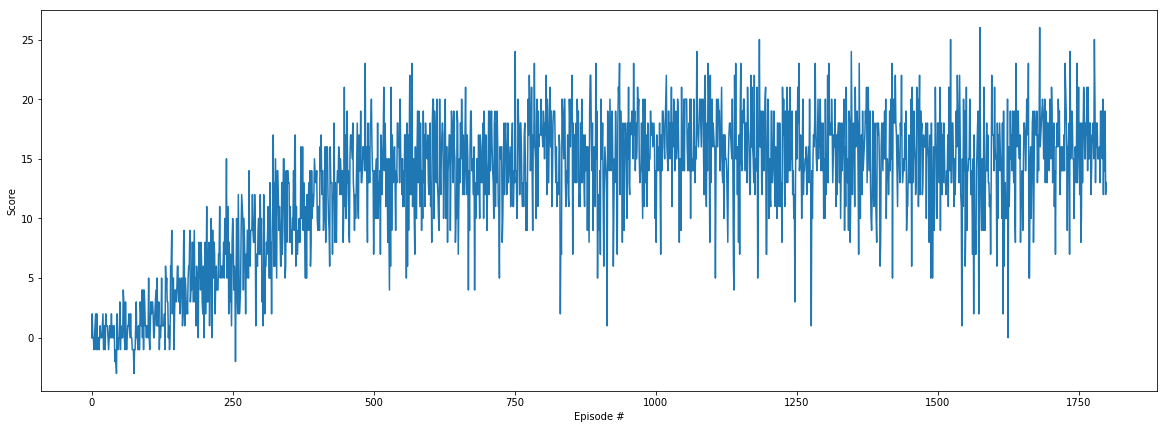

In [16]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
plt.savefig('Plot.png')

<Figure size 432x288 with 0 Axes>